In [1]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml(data_id=42803, as_frame=True)
df_X = dataset["frame"]

In [2]:
df_X.shape

(363243, 67)

In [3]:
import pandas as pd

pd.value_counts(df_X.dtypes)

float64    61
object      6
dtype: int64

In [4]:
df_X.select_dtypes(exclude="number").head()

,Accident_Index,Sex_of_Driver,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
0,201501BS70001,1.0,12/01/2015,18:45,E09000020,E01002825
1,201501BS70002,1.0,12/01/2015,07:50,E09000020,E01002820
2,201501BS70004,1.0,12/01/2015,18:08,E09000020,E01002833
3,201501BS70005,1.0,13/01/2015,07:40,E09000020,E01002874
4,201501BS70008,1.0,09/01/2015,07:30,E09000020,E01002814


In [5]:
df_X["Sex_of_Driver"] = df_X["Sex_of_Driver"].astype("float")

In [6]:
df_X.describe(exclude="number")

,Accident_Index,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
count,363243,319866,319822,319866,298758
unique,140056,365,1439,204,25979
top,201543P296025,14/02/2015,17:30,E10000017,E01028497
freq,1332,2144,2972,8457,1456


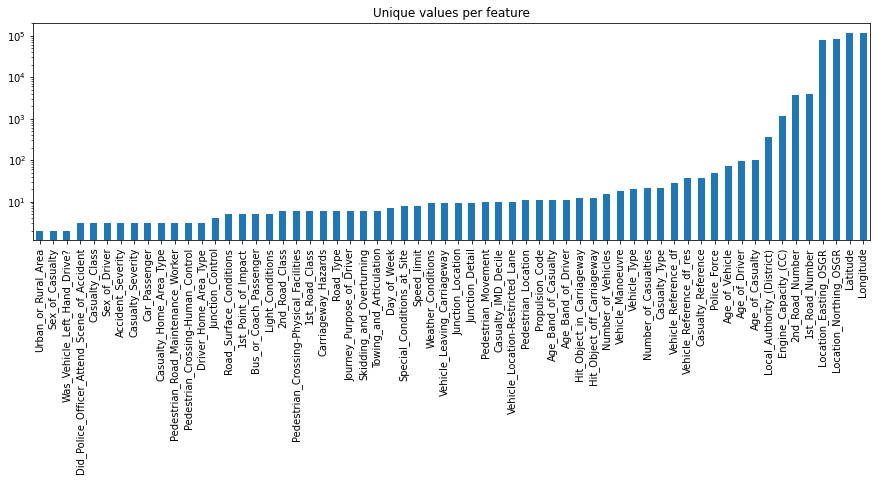

In [7]:
unique_values = df_X.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.bar(logy=True,figsize=(15,4), title="Unique values per feature");

In [8]:
n_duplicates = df_X.drop(labels=["Accident_Index"], axis=1).duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 22 duplicates in your database.


In [9]:
columns_to_consider = df_X.drop(labels=["Accident_Index"], axis=1).columns

df_X = df_X.drop_duplicates(subset=columns_to_consider)
df_X.shape

(363221, 67)

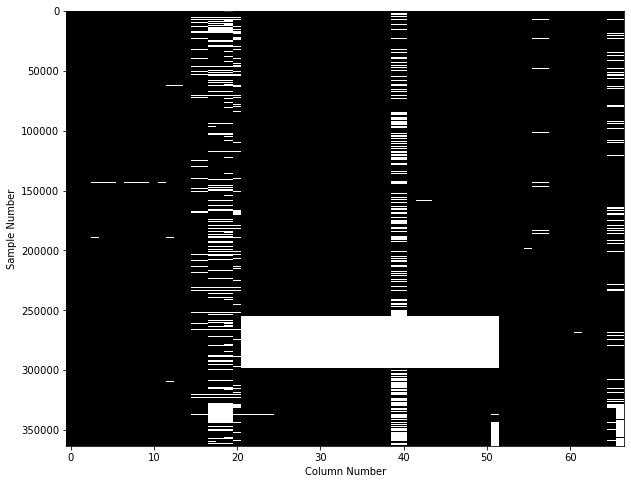

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(df_X.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

In [11]:
import missingno as msno

msno.matrix(df_X, labels=True, sort="descending");

ModuleNotFoundError: No module named 'missingno'

In [12]:
df_X = df_X.dropna(thresh=df_X.shape[1] * 0.80, axis=0).reset_index(drop=True)
df_X.shape

(319790, 67)

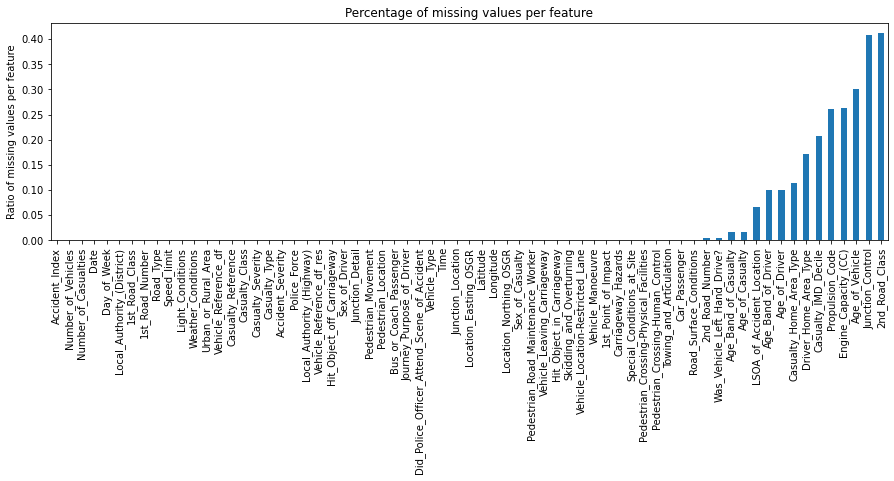

In [13]:
df_X.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [14]:
df_X = df_X.dropna(thresh=df_X.shape[0] * 0.85, axis=1)
df_X.shape

(319790, 60)

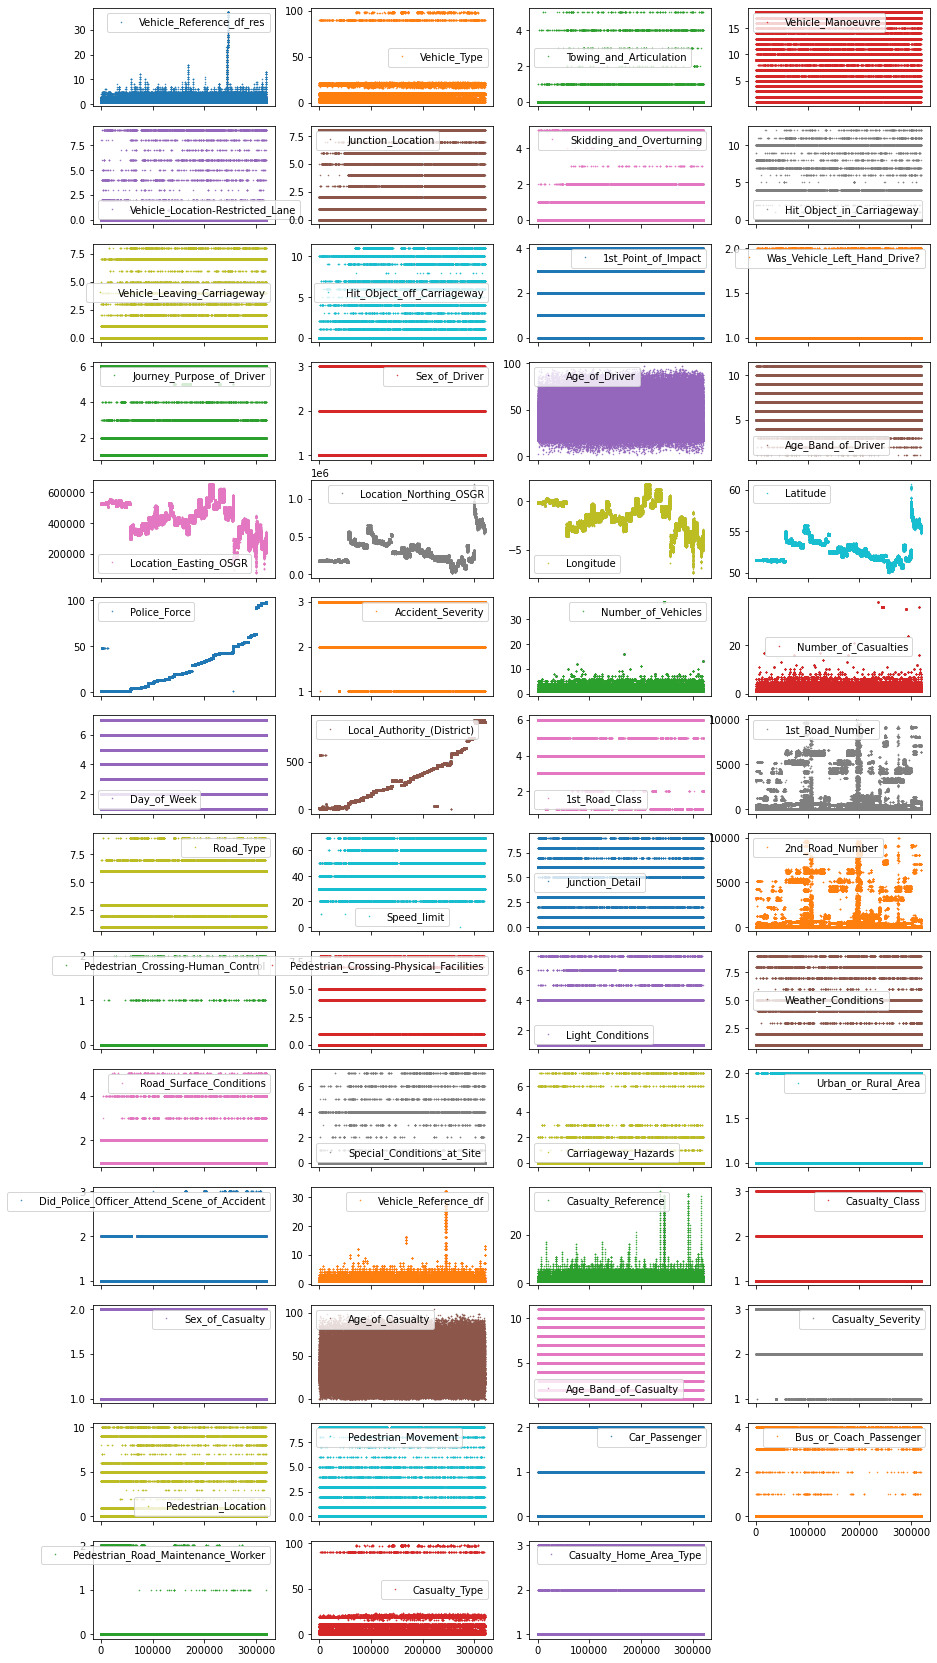

In [15]:
df_X.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
         figsize=(15, 30), markersize=1);

In [16]:
df_X.describe(exclude=["number", "datetime"])

,Accident_Index,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
count,319790,319790,319746,319790,298693
unique,123645,365,1439,204,25977
top,201543P296025,14/02/2015,17:30,E10000017,E01028497
freq,1332,2144,2969,8457,1456


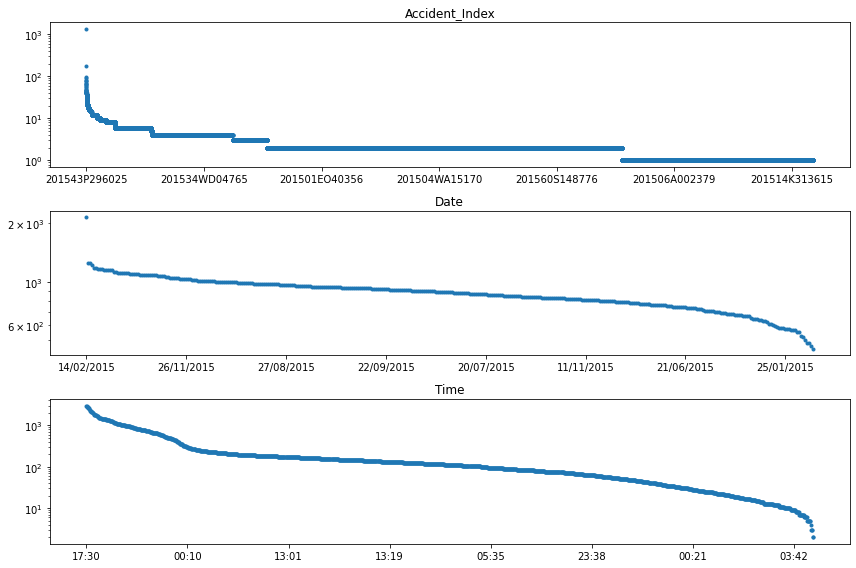

In [17]:
fig, axes = plt.subplots(ncols=1, nrows = 3, figsize = (12, 8))
df_non_numerical = df_X.select_dtypes(exclude=["number", "datetime"])
for col, ax in zip(df_non_numerical.columns, axes.ravel()):
    df_non_numerical[col].value_counts().plot(
        logy=True, title=col, lw=0, marker=".", ax=ax)
plt.tight_layout();

In [18]:
accident_ids = df_non_numerical["Accident_Index"].value_counts().head(10).index
df_X = df_X[~df_X["Accident_Index"].isin(accident_ids)]
df_X.shape

(317665, 60)

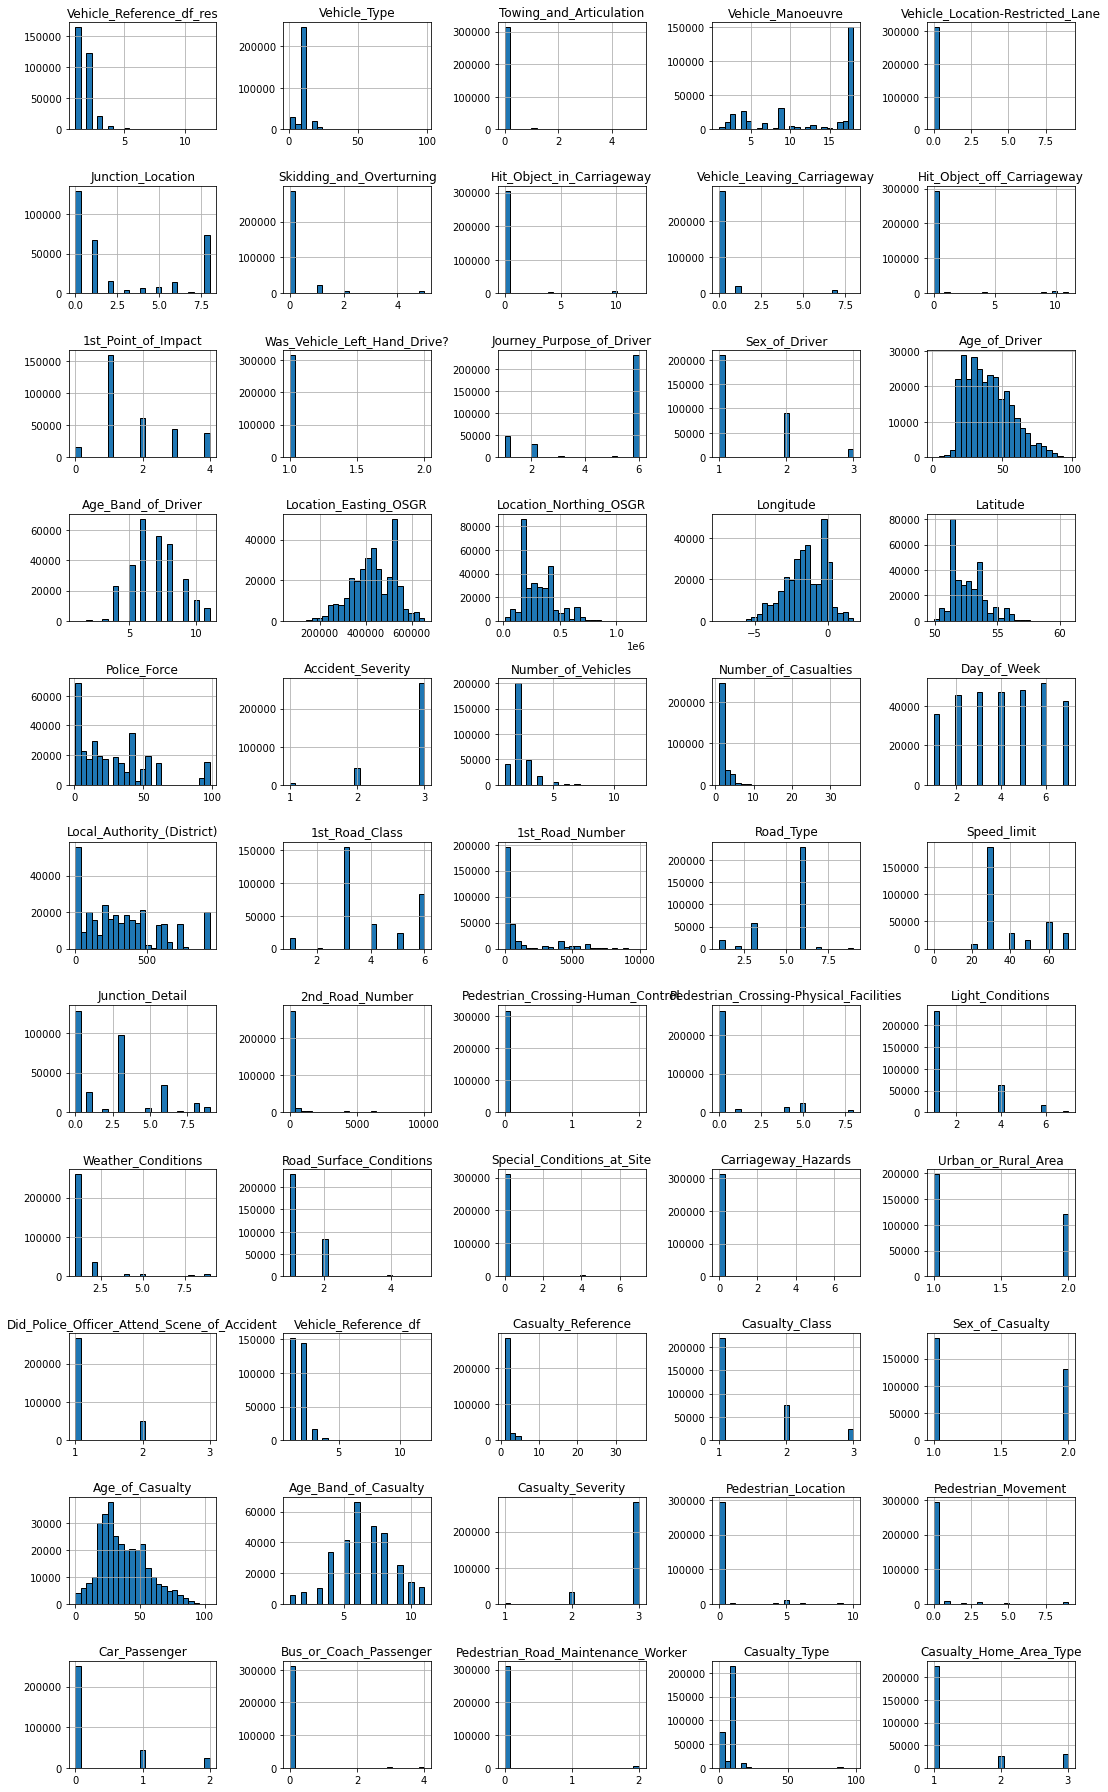

In [19]:
df_X.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

Pedestrian_Crossing-Human_Control    0.995259
Was_Vehicle_Left_Hand_Drive?         0.990137
Carriageway_Hazards                  0.983646
Towing_and_Articulation              0.983221
Vehicle_Location-Restricted_Lane     0.982088
dtype: float64

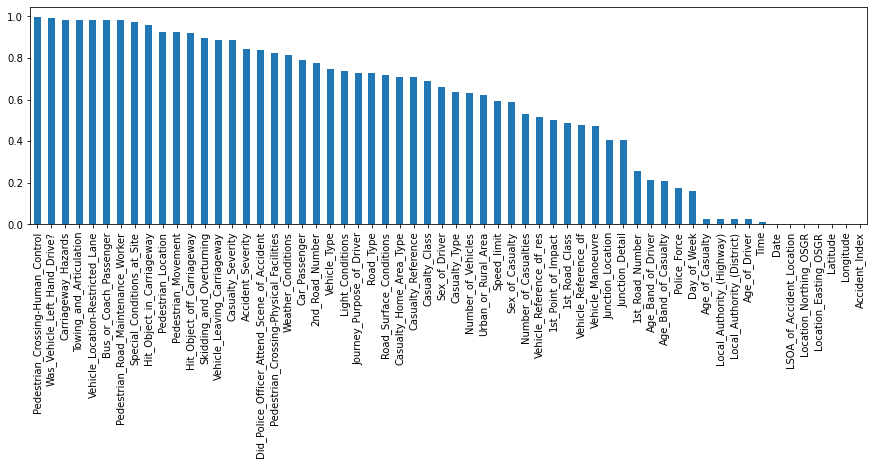

In [20]:
most_frequent_entry = df_X.mode()
df_freq = df_X.eq(most_frequent_entry.values, axis=1)
df_freq = df_freq.mean().sort_values(ascending=False)
display(df_freq.head())
df_freq.plot.bar(figsize=(15, 4));

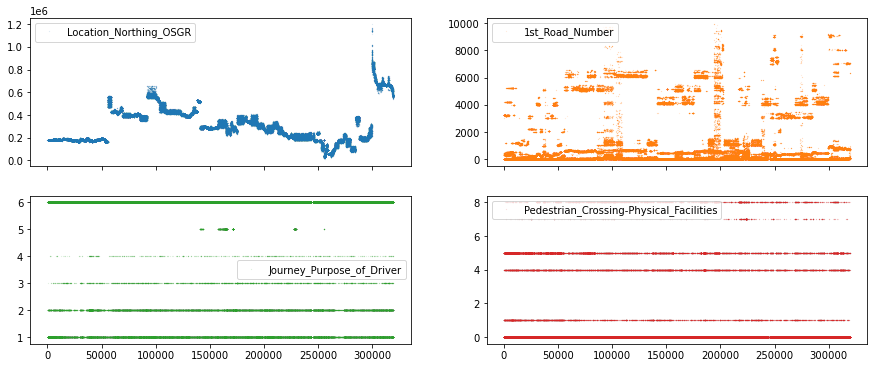

In [21]:
df_X[["Location_Northing_OSGR", "1st_Road_Number", "Journey_Purpose_of_Driver",
     "Pedestrian_Crossing-Physical_Facilities"]].plot(
    lw = 0, marker = ".", subplots=True, layout=(-1, 2), markersize=0.1, figsize=(15,6));

In [22]:
cols_continuous = df_X.select_dtypes(include="number").nunique() >= 25

In [23]:
df_continuous = df_X[cols_continuous[cols_continuous].index]
df_continuous.shape

(317665, 11)

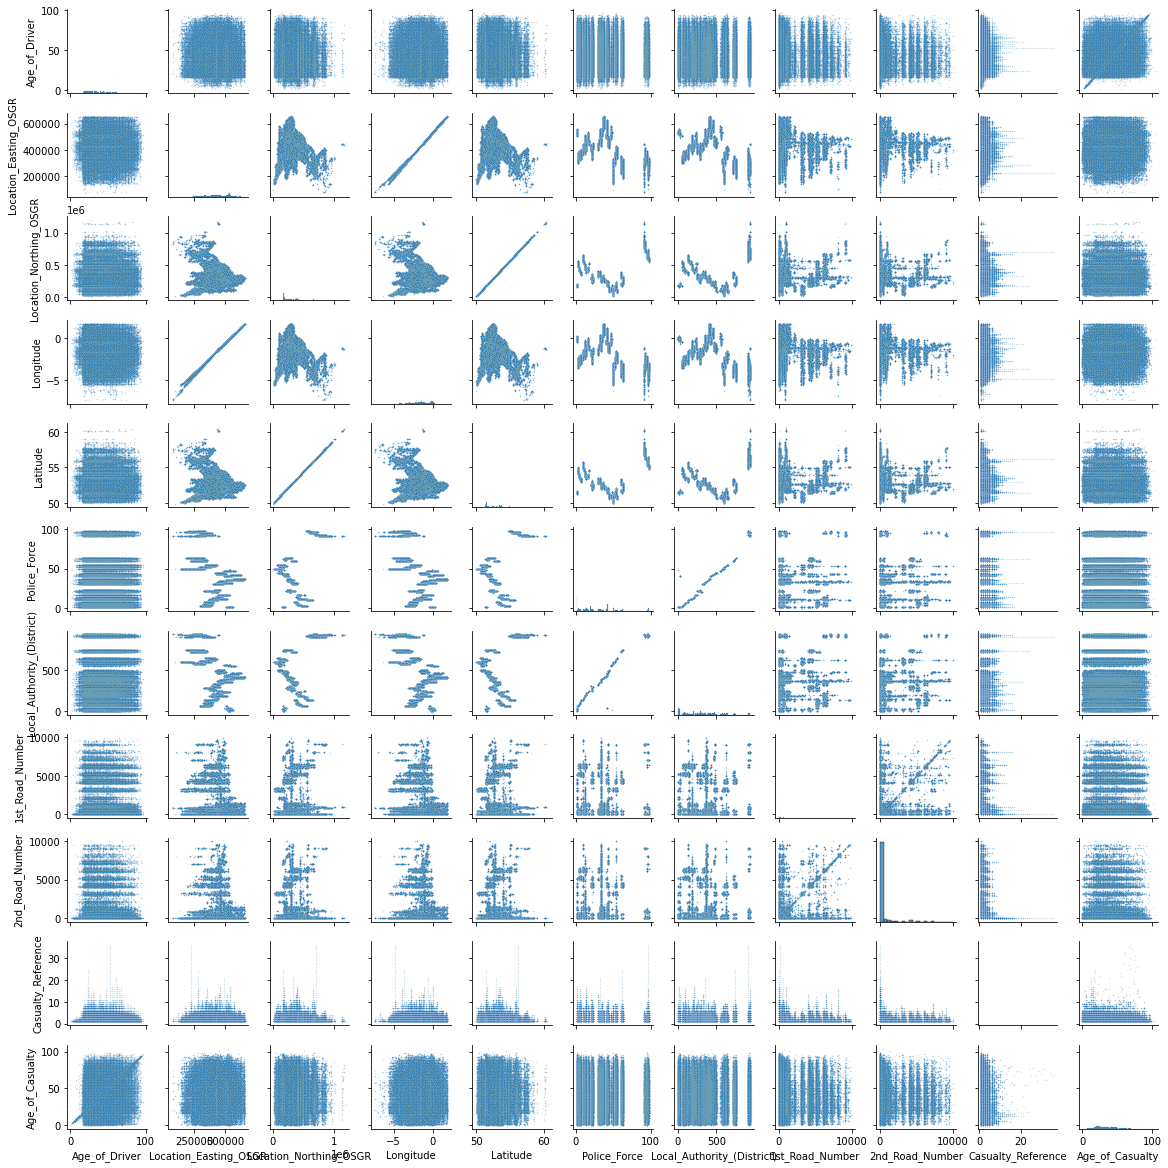

In [24]:
import seaborn as sns

sns.pairplot(df_continuous, height=1.5, plot_kws={"s":2, "alpha":0.2});

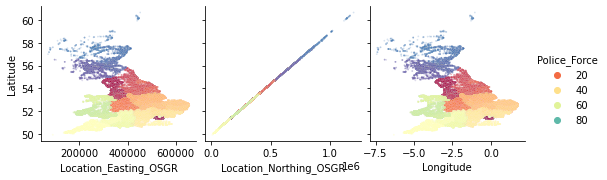

In [26]:
sns.pairplot(
    df_X, plot_kws={"s": 3, "alpha": 0.2}, hue = "Police_Force", palette="Spectral",
    x_vars = ["Location_Easting_OSGR", "Location_Northing_OSGR", "Longitude"],
    y_vars = "Latitude");

In [27]:
df_discrete = df_X[cols_continuous[~cols_continuous].index]
df_discrete.shape

(317665, 44)

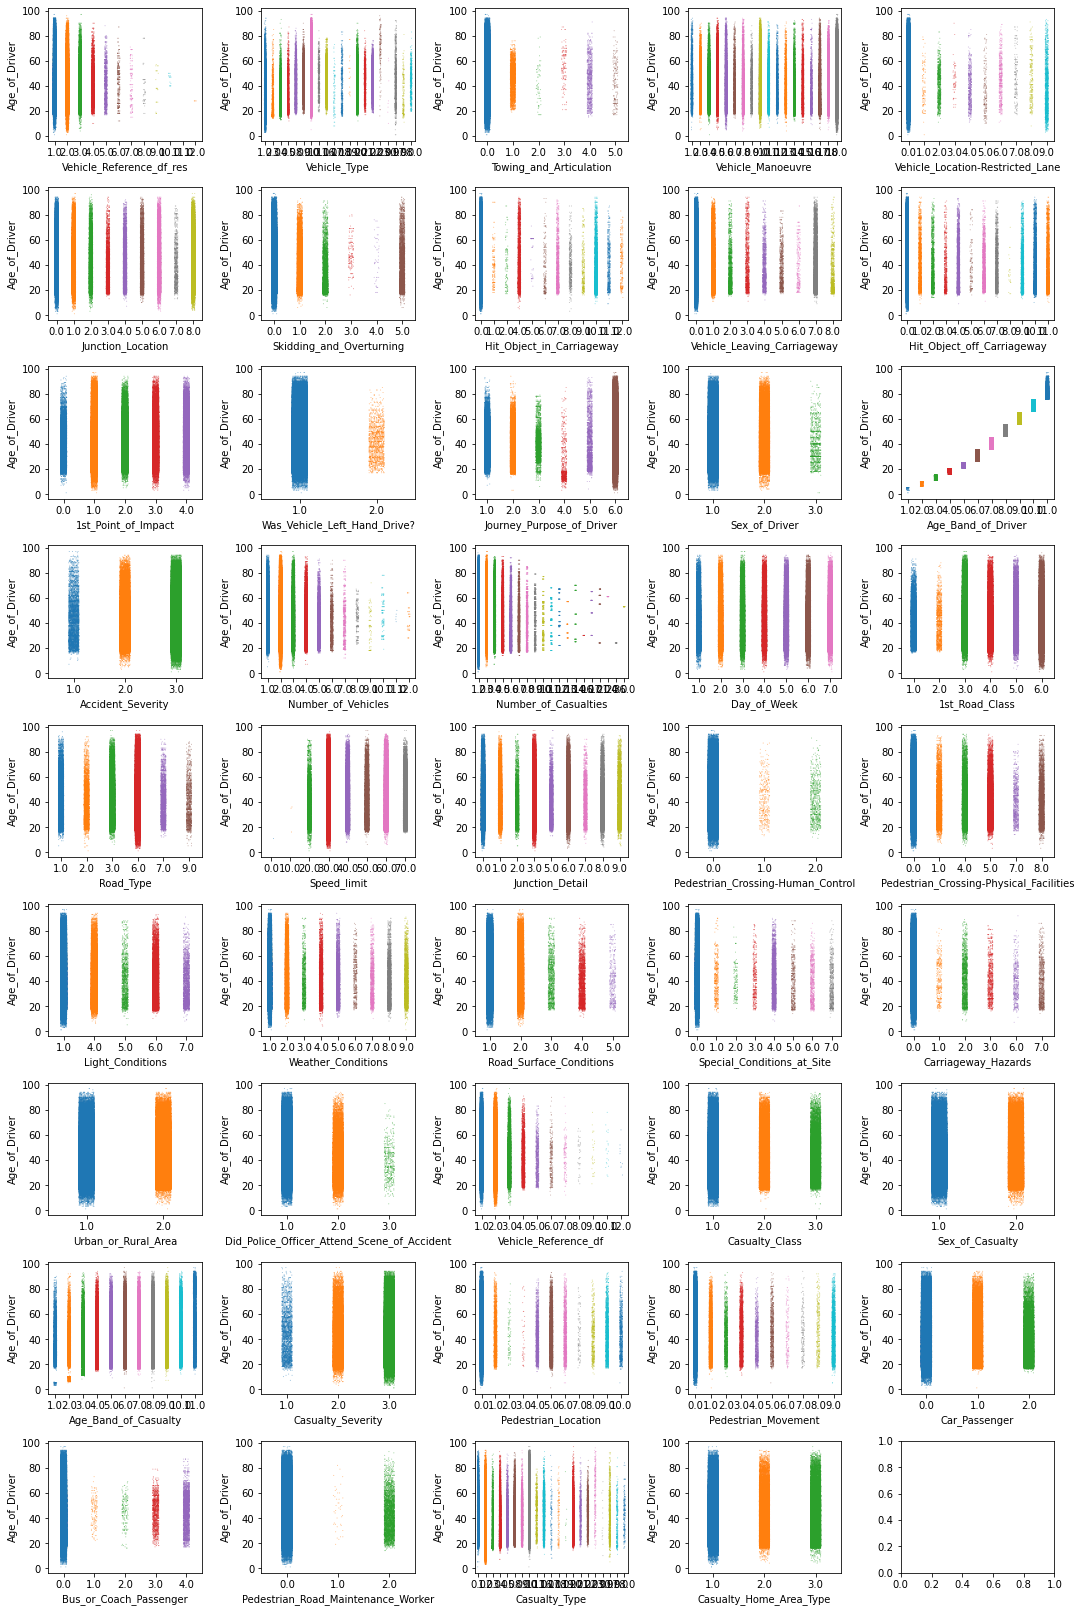

In [28]:
import numpy as np

n_cols = 5
n_elements = len(df_discrete.columns)
n_rows = np.ceil(n_elements / n_cols).astype("int")

y_value = df_X["Age_of_Driver"]

fig, axes = plt.subplots(ncols=n_cols, nrows = n_rows, figsize = (15, n_rows * 2.5))

for col, ax in zip(df_discrete.columns, axes.ravel()):
    sns.stripplot(data=df_X, x=col, y=y_value, ax=ax, palette="tab10", size=1, alpha=0.5)

plt.tight_layout();

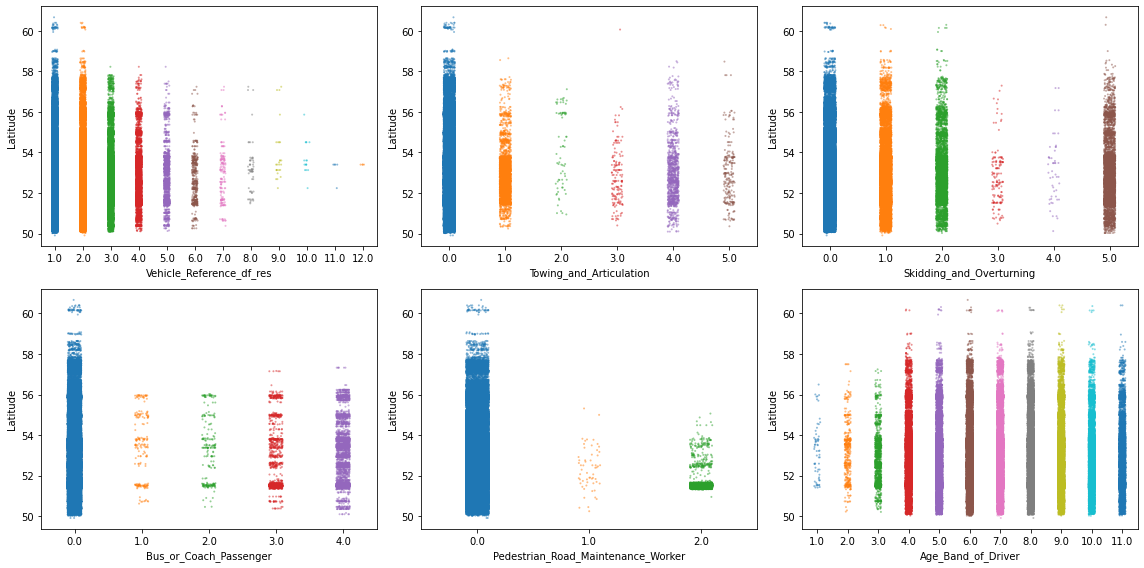

In [29]:
selected_features = ["Vehicle_Reference_df_res", "Towing_and_Articulation",
                    "Skidding_and_Overturning", "Bus_or_Coach_Passenger",
                    "Pedestrian_Road_Maintenance_Worker", "Age_Band_of_Driver"]

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16,8))

for col, ax in zip(selected_features, axes.ravel()):
    sns.stripplot(data=df_X, x=col, y=df_X["Latitude"], ax=ax,
                 palette="tab10", size=2, alpha=0.5)
    
plt.tight_layout();

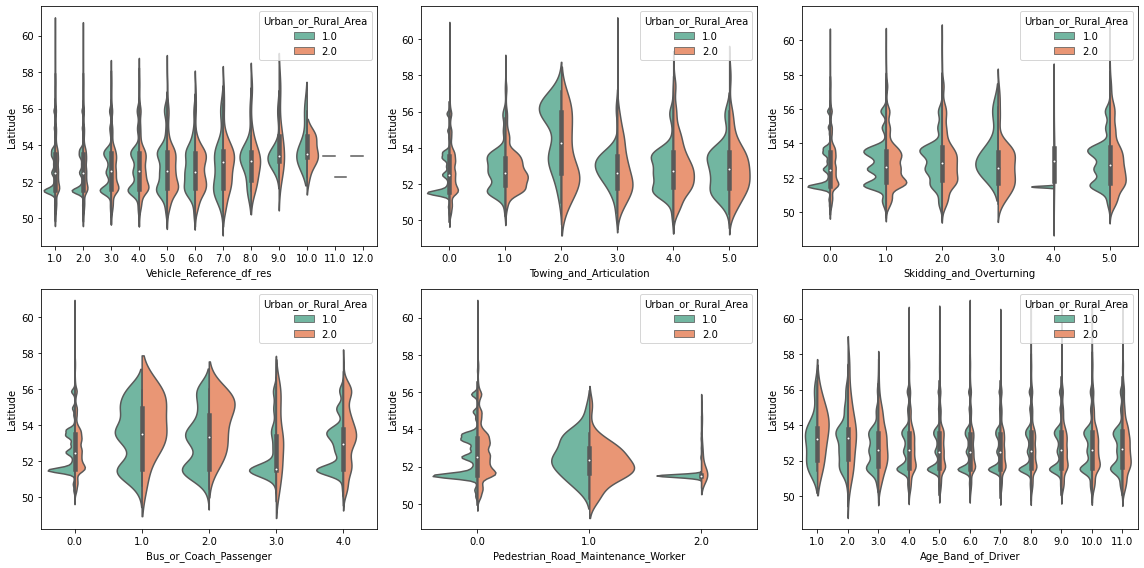

In [30]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16,8))

for col, ax in zip(selected_features, axes.ravel()):
    sns.violinplot(data=df_X, x=col, y=df_X["Latitude"], palette="Set2",
                  split=True, hue="Urban_or_Rural_Area", ax=ax)
    
plt.tight_layout();

In [31]:
df_corr = df_X.corr(method="pearson")

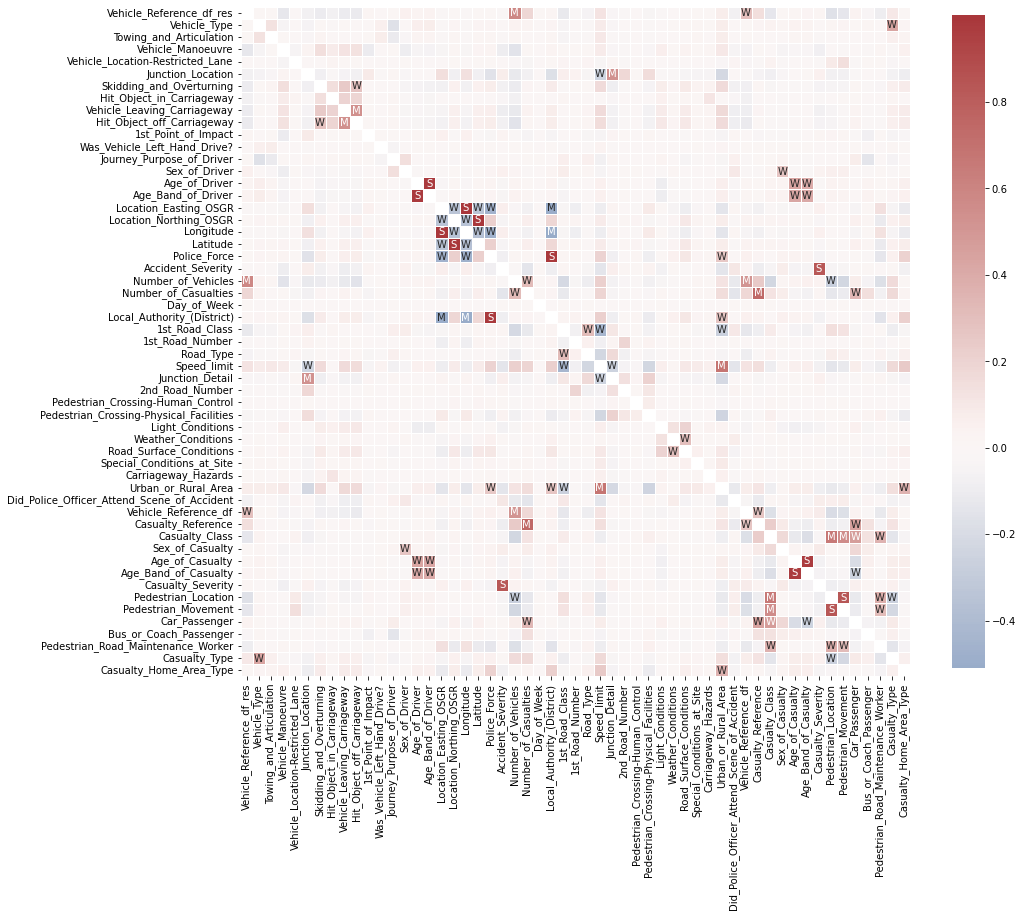

In [32]:
labels = np.where(np.abs(df_corr)>0.75, "S",
                 np.where(np.abs(df_corr)>0.5, "M",
                         np.where(np.abs(df_corr)>0.25, "W", "")))

plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
           center=0, annot=labels, fmt='', linewidths=.5,
           cmap="vlag", cbar_kws={"shrink":0.8});

In [33]:
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

display(df_corr_stacked)

Local_Authority_(District)  Longitude                -0.509343
                            Location_Easting_OSGR    -0.502919
Police_Force                Longitude                -0.471327
                            Location_Easting_OSGR    -0.461112
Speed_limit                 1st_Road_Class           -0.438931
                                                        ...   
Age_Band_of_Casualty        Age_of_Casualty           0.974397
Age_Band_of_Driver          Age_of_Driver             0.979019
Local_Authority_(District)  Police_Force              0.984819
Longitude                   Location_Easting_OSGR     0.999363
Latitude                    Location_Northing_OSGR    0.999974
Length: 1485, dtype: float64